<a href="https://colab.research.google.com/github/Liza-IITP/MachineLearning/blob/main/Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1797, 64)
['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[0 1 2 3 4]


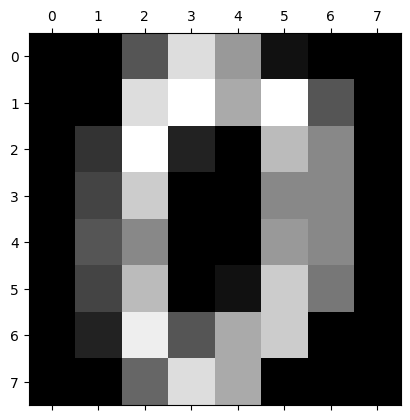

In [21]:
# Importing Utilities
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
# Loading and Visualising Data

digits = load_digits()
print(digits.data.shape) #1797 * 64
print(dir(digits)) # All Columns
print(digits.images[0]) # 8*8 matrix
print(digits.target[0:5])

plt.matshow(digits.images[0], cmap="gray")
plt.show()


0.9797979797979798
0.9696969696969697
[6]


np.int64(6)

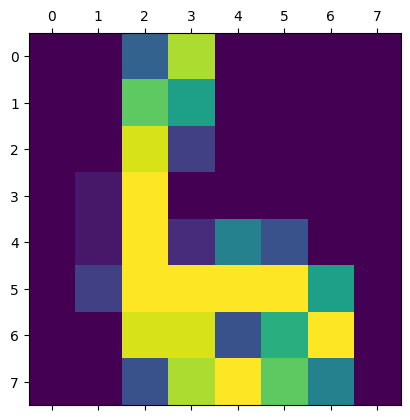

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# With Scaler
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size = 0.11,random_state = 42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
print(pipe.score(X_test, y_test))
# Without
model = LogisticRegression(max_iter=1000)
model.fit(X_train , y_train)
print(model.score(X_test , y_test))

# Random Test
plt.matshow(digits.images[67])
print(model.predict([digits.data[67]]))
digits.target[67]

In [23]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12
           2       0.95      1.00      0.98        20
           3       0.95      0.95      0.95        20
           4       1.00      0.96      0.98        27
           5       0.96      0.96      0.96        24
           6       0.95      1.00      0.98        21
           7       1.00      0.95      0.97        19
           8       0.90      1.00      0.95         9
           9       0.96      0.93      0.95        28

    accuracy                           0.97       198
   macro avg       0.97      0.97      0.97       198
weighted avg       0.97      0.97      0.97       198



Text(95.72222222222221, 0.5, 'Truth')

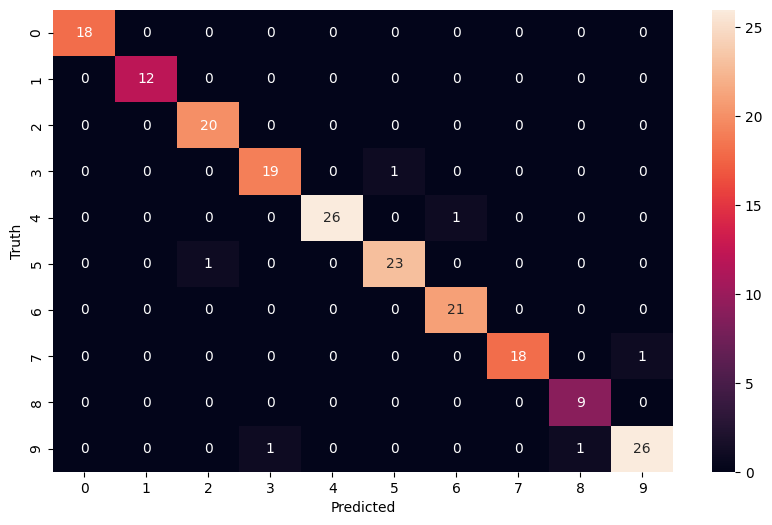

In [24]:
import seaborn as sn
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
